# Вебинар 5. Обучение без учителя.

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd
import pickle

from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d.axes3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matplotlib.rcParams.update({'font.size': 12})
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
def apply_elbow_method(X):
    distortions = []
    K = range(2,15)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
        distortions.append(sum(np.min(cdist(X, 
                                            kmeanModel.cluster_centers_, 
                                            'euclidean'), 
                                      axis=1)) / X.shape[0])

    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k');

In [4]:
def display_clusters_distribution(unique_labels, labels_counts):
    plt.figure(figsize=(8,5))

    plt.bar(unique, counts)

    plt.xlabel('Clusters')
    plt.xticks(unique)
    plt.ylabel('Count')
    plt.title('Clusters distribution');

In [5]:
def reduce_dims_to_2D_space_with_PCA(df):
    pca = PCA(n_components=2)
    components = pca.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2'])
    
def reduce_dims_to_3D_space_with_PCA(df):
    pca = PCA(n_components=3)
    components = pca.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2', 'component_3'])

def reduce_dims_to_2D_space_with_TSNE(df):
    tsne = TSNE(n_components=2, random_state=42)
    components = tsne.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2'])
    
def reduce_dims_to_3D_space_with_TSNE(df):
    tsne = TSNE(n_components=3, random_state=42)
    components = tsne.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2', 'component_3'])  

In [6]:
def display_components_in_3D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, labels], axis=1)

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    
    if labels is not None:
        p = ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   c=labels, cmap=plt.get_cmap('jet'), alpha=0.5)
    else:
        p = ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   alpha=0.5)

    ax.set_xlabel('component_1')
    ax.set_ylabel('component_2')
    ax.set_zlabel('component_3')
    ax.set_title('3D mapping of objects')
    fig.colorbar(p);

In [7]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, labels], axis=1)
    
    if labels is not None:
        p = components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=labels.name, cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=(12,6), sharex=False)
    else:
        p = components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                       alpha=0.5, figsize=(12,6))

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects'); 

In [8]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(round(mean_absolute_error(true_values_train, pred_values_train), 3)) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(round(mean_absolute_error(true_values_test, pred_values_test), 3))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

**Пути к директориям и файлам**

In [9]:
TRAIN_DATASET_PATH = '../data/housing_prepared.csv'
TRAIN_DATASET_EXT_PATH = '../data/housing_ext.csv'

### Загрузка данных

**Описание датасета**

Статистические данные о группах домов в Калифорнии, основанные на переписи 1990 года.   

A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

* **longitude** - долгота группы
* **latitude** - широта группы
* **housing_median_age** - средний возраст дома в группе (Median age of a house within a block)
* **total_rooms** - общее количество комнат в группе домов (Total number of rooms within a block)
* **total_bedrooms** - общее количество спален в группе домов (Total number of bedrooms within a block)
* **population** - количество проживающих в группе домов (Total number of people residing within a block)
* **households** - количество семей (Total number of households, a group of people residing within a home unit, for a block)
* **ocean_proximity** - близость океана
* **median_income** - средний доход семьи (Median income for households within a block of houses, measured in tens of thousands of US Dollars)
* **median_house_value** - средняя стоимость дома (Median house value for households within a block, measured in US Dollars)

In [10]:
df = pd.read_csv(TRAIN_DATASET_PATH)
df.drop(['ocean_proximity'], axis=1, inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_household,persons_per_household,income_per_person
0,-122.23000,37.88000,41.00000,880.00000,129.00000,322.00000,126.00000,8.32520,452600.00000,0,0,1,0,6.98413,1.02381,2.55556,258.54658
1,-122.22000,37.86000,21.00000,7099.00000,1106.00000,2401.00000,1138.00000,8.30140,358500.00000,0,0,1,0,6.23814,0.97188,2.10984,34.57476
2,-122.24000,37.85000,52.00000,1467.00000,190.00000,496.00000,177.00000,7.25740,352100.00000,0,0,1,0,8.28814,1.07345,2.80226,146.31855
3,-122.25000,37.85000,52.00000,1274.00000,235.00000,558.00000,219.00000,5.64310,341300.00000,0,0,1,0,5.81735,1.07306,2.54795,101.13082
4,-122.25000,37.85000,52.00000,1627.00000,280.00000,565.00000,259.00000,3.84620,342200.00000,0,0,1,0,6.28185,1.08108,2.18147,68.07434


### Разбиение на train и test

In [11]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=42)
X_train.shape, y_train.shape

((15476, 16), (15476,))

### Масштабирование признаков

In [13]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                        columns=X_train.columns, 
                        index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), 
                        columns=X_test.columns, 
                        index=X_test.index)

features = X_train_scaled.iloc[:, :8]
features.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,15476.00000,0.00000,1.00003,-2.37937,-1.11286,0.53759,0.78191,2.54705
latitude,15476.00000,0.00000,1.00003,-1.45155,-0.79615,-0.64634,0.97345,2.95371
housing_median_age,15476.00000,0.00000,1.00003,-2.23929,-0.78228,0.02717,0.67473,1.88890
total_rooms,15476.00000,0.00000,1.00003,-1.21777,-0.54877,-0.23340,0.24001,16.26041
total_bedrooms,15476.00000,-0.00000,1.00003,-1.28081,-0.57675,-0.24739,0.25858,14.09635
population,15476.00000,-0.00000,1.00003,-1.24866,-0.55173,-0.22743,0.24452,30.10812
households,15476.00000,-0.00000,1.00003,-1.30574,-0.57898,-0.23556,0.27730,14.60313
median_income,15476.00000,0.00000,1.00003,-1.76971,-0.68769,-0.17958,0.46037,5.81815


### Понижение размерности: PCA - Метод главных компонент

**Как работает PCA**

![](PCA.png)

Первая главная компонента:

$$\text{PC1}=a_1X_A+b_1X_B$$

Вторая главная компонента:

$$\text{PC2}=a_2X_A+b_2X_B$$

где $a_i, b_i$ - веса переменных $X_A$ и $X_B$.

**Снижение размерности до 2х компонент**

In [14]:
components_2d_pca = reduce_dims_to_2D_space_with_PCA(features)
components_2d_tsne = reduce_dims_to_2D_space_with_TSNE(features)

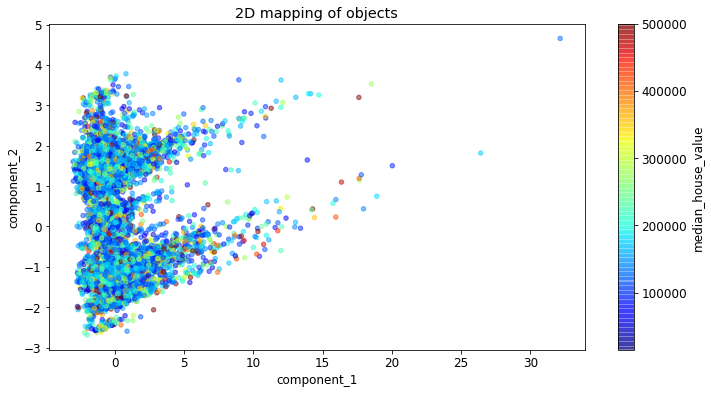

In [15]:
display_components_in_2D_space(components_2d_pca, y_train)

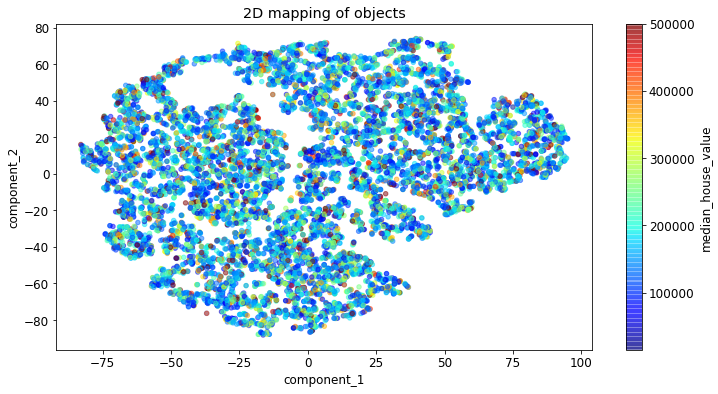

In [16]:
display_components_in_2D_space(components_2d_tsne, y_train)

**Снижение размерности до 3х компонент**

In [17]:
components_3d_pca = reduce_dims_to_3D_space_with_PCA(features)
components_3d_tsne = reduce_dims_to_3D_space_with_TSNE(features)

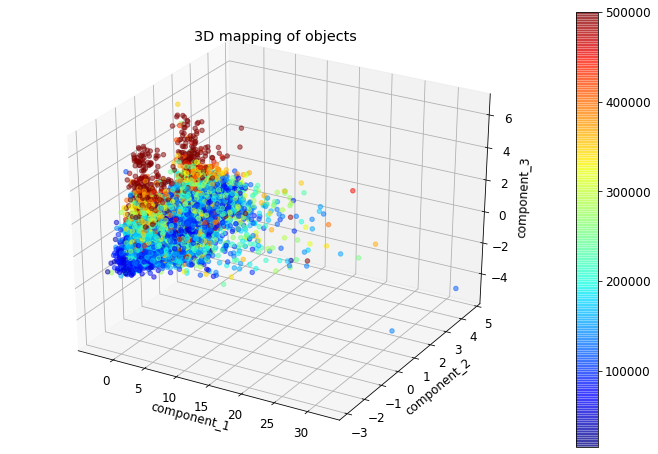

In [18]:
display_components_in_3D_space(components_3d_pca, y_train)

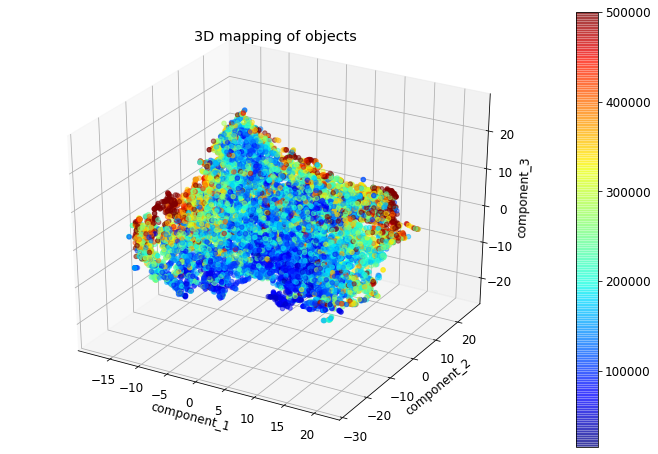

In [19]:
display_components_in_3D_space(components_3d_tsne, y_train)

Проверим, насколько PCA улучшит результаты для предсказательной модели.

In [20]:
pca = PCA(n_components=3)
components_3d_pca_train = pca.fit_transform(features)

for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            features.columns)), '\n')

1 component: 48.45% of initial variance
0.078 x longitude + -0.076 x latitude + -0.217 x housing_median_age + 0.485 x total_rooms + 0.491 x total_bedrooms + 0.469 x population + 0.493 x households + 0.043 x median_income 

2 component: 23.83% of initial variance
-0.701 x longitude + 0.702 x latitude + 0.015 x housing_median_age + 0.077 x total_rooms + 0.062 x total_bedrooms + 0.027 x population + 0.065 x households + -0.036 x median_income 

3 component: 13.41% of initial variance
-0.056 x longitude + 0.013 x latitude + -0.396 x housing_median_age + 0.096 x total_rooms + -0.117 x total_bedrooms + -0.117 x population + -0.107 x households + 0.890 x median_income 



In [21]:
components = pca.transform(X_test_scaled.iloc[:, :8])
components_3d_pca_test = pd.DataFrame(data = components, 
                                      columns = ['component_1', 'component_2', 'component_3'])

In [22]:
X_train_pca = pd.concat([X_train.reset_index(), 
                   components_3d_pca], axis=1)
X_train_pca.shape

(15476, 20)

In [23]:
X_test_pca = pd.concat([X_test.reset_index(), 
                   components_3d_pca_test], axis=1)
X_test_pca.shape

(5159, 20)

In [24]:
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=7, random_state=42)
gb_model.fit(X_train_pca, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Train:	R2 = 0.935	MAE = 21043.653
Test:	R2 = 0.833	MAE = 30239.617


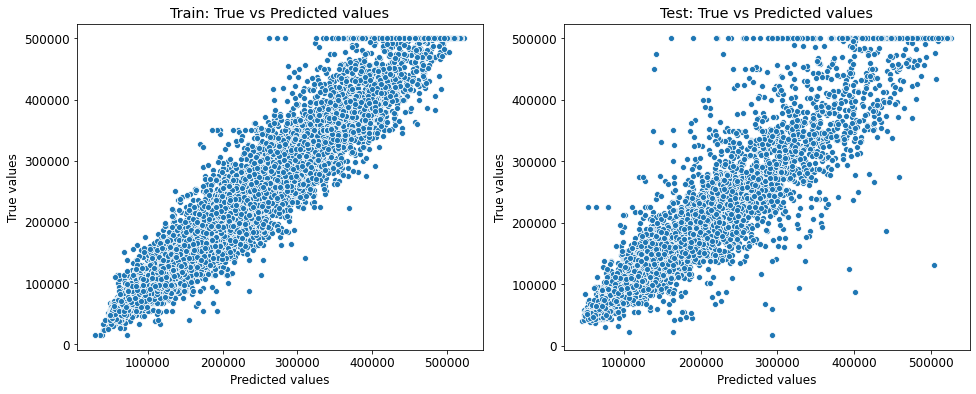

In [25]:
y_train_preds = gb_model.predict(X_train_pca)
y_test_preds = gb_model.predict(X_test_pca)
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [26]:
feature_importances = pd.DataFrame(zip(X_train_pca.columns, gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
8,median_income,0.49934
10,INLAND,0.14046
15,persons_per_household,0.10963
0,index,0.05310
1,longitude,0.04985
2,latitude,0.04386
3,housing_median_age,0.03343
13,rooms_per_household,0.01771
14,bedrooms_per_household,0.01189
18,component_2,0.00721


### Кластеризация: k-means - Метод k-средних

**Как работает k-means**

<img src="kmeans_v2.gif">

**Оценка оптимального количества кластеров**

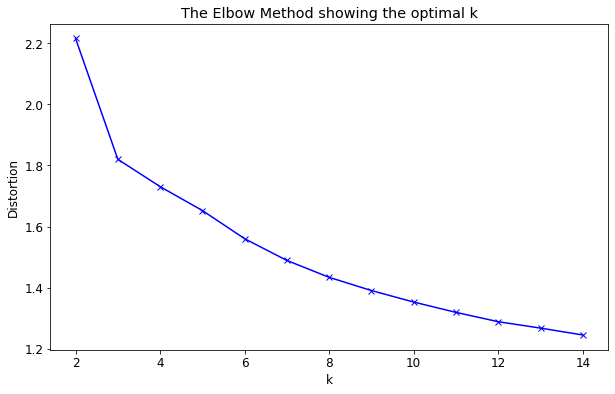

In [27]:
apply_elbow_method(features)

**Выделение 3 кластеров**

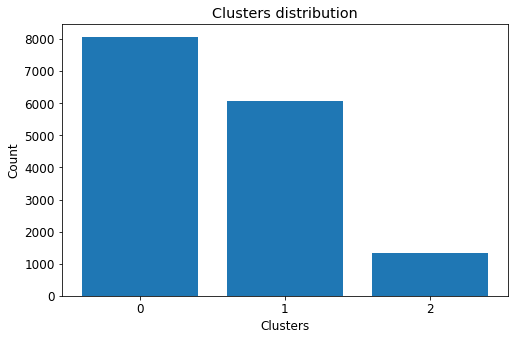

In [28]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_clast_3 = kmeans_3.fit_predict(features)
labels_clast_3 = pd.Series(labels_clast_3, name='clusters_3')

unique, counts = np.unique(labels_clast_3, return_counts=True)
display_clusters_distribution(unique, counts)

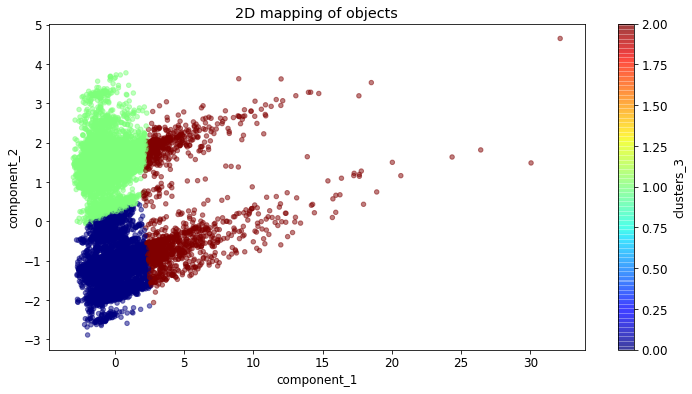

In [29]:
display_components_in_2D_space(components_2d_pca, labels_clast_3)

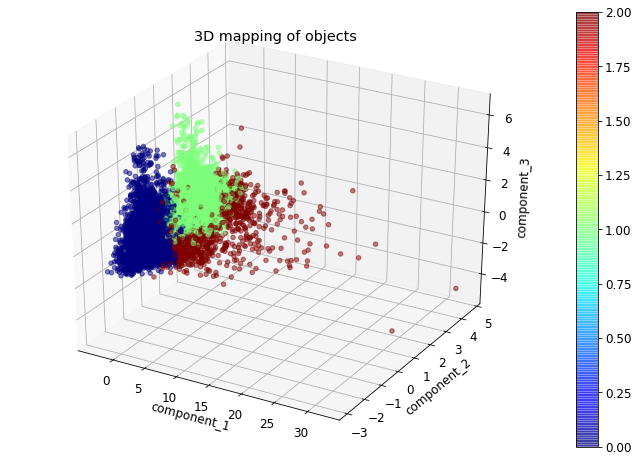

In [30]:
display_components_in_3D_space(components_3d_pca, labels_clast_3)

**Выделение 6 кластеров**

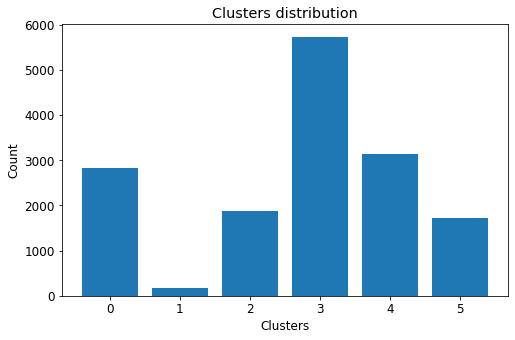

In [31]:
kmeans_6 = KMeans(n_clusters=6, random_state=42)
labels_clast_6 = kmeans_6.fit_predict(features)
labels_clast_6 = pd.Series(labels_clast_6, name='clusters_6')

unique, counts = np.unique(labels_clast_6, return_counts=True)
display_clusters_distribution(unique, counts)

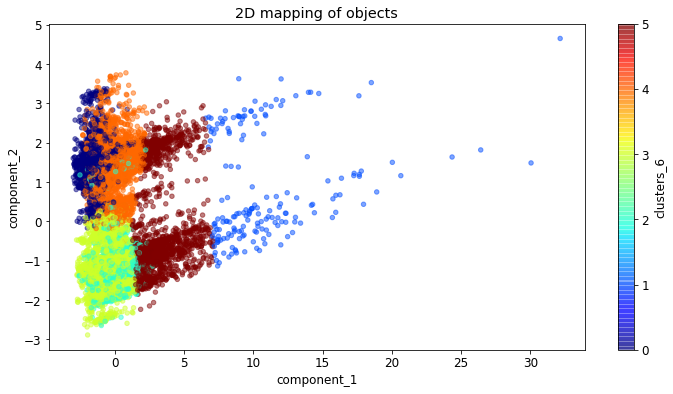

In [32]:
display_components_in_2D_space(components_2d_pca, labels_clast_6)

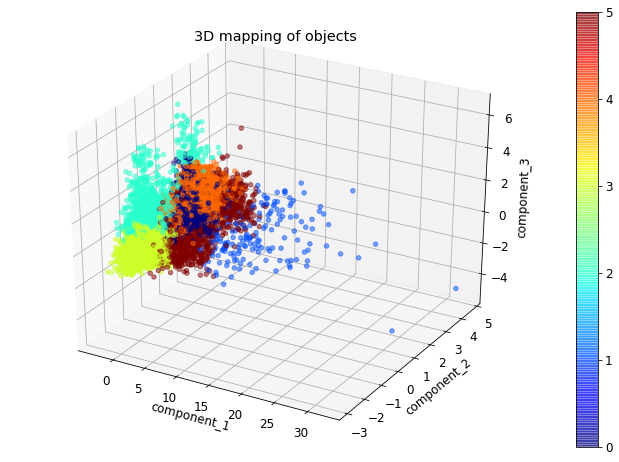

In [33]:
display_components_in_3D_space(components_3d_pca, labels_clast_6)

### Добавление новых признаков

In [34]:
clusters_3_dummies = pd.get_dummies(labels_clast_3, drop_first=True, prefix='clusters_3')
clusters_6_dummies = pd.get_dummies(labels_clast_6, drop_first=True, prefix='clusters_6')

X_train_ext = pd.concat([X_train_pca.reset_index(), 
                    clusters_3_dummies, 
                    clusters_6_dummies], axis=1)

X_train_ext.shape

(15476, 28)

In [35]:
labels_clast_3 = kmeans_3.predict(X_test_scaled.iloc[:, :8])
labels_clast_6 = kmeans_6.predict(X_test_scaled.iloc[:, :8])

clusters_3_dummies = pd.get_dummies(labels_clast_3, drop_first=True, prefix='clusters_3')
clusters_6_dummies = pd.get_dummies(labels_clast_6, drop_first=True, prefix='clusters_6')

X_test_ext = pd.concat([X_test_pca.reset_index(), 
                    clusters_3_dummies, 
                    clusters_6_dummies], axis=1)

X_test_ext.shape

(5159, 28)

### Переобучение и оценка финальной модели

In [36]:
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=7, random_state=42)
gb_model.fit(X_train_ext, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Train:	R2 = 0.937	MAE = 20607.945
Test:	R2 = 0.834	MAE = 30227.828


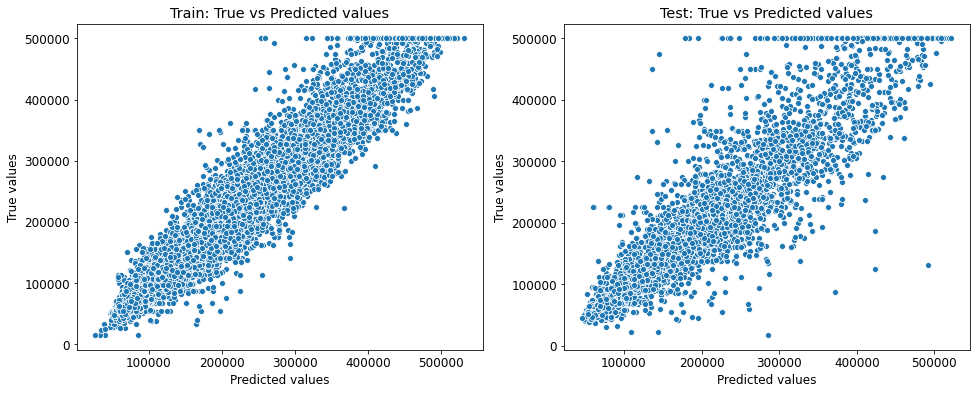

In [37]:
y_train_preds = gb_model.predict(X_train_ext)
y_test_preds = gb_model.predict(X_test_ext)
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [38]:
feature_importances = pd.DataFrame(zip(X_train_ext.columns, gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
9,median_income,0.49761
11,INLAND,0.14012
16,persons_per_household,0.10831
1,index,0.05564
2,longitude,0.04988
3,latitude,0.04415
4,housing_median_age,0.03287
14,rooms_per_household,0.01698
15,bedrooms_per_household,0.01107
19,component_2,0.00710
